In [3]:
import os
os.chdir('../..')

In [5]:
from spikelearn import io
from skopt import load, plots

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from glob import glob

In [8]:
res = load('data/results/hyperopt/rbfSVM/results_minimization_sp_pfc.pickle')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1263076ba8>,
      dtype=object)

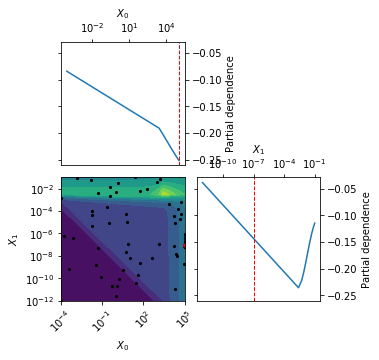

In [9]:
plots.plot_objective(res)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1262fb7668>,
      dtype=object)

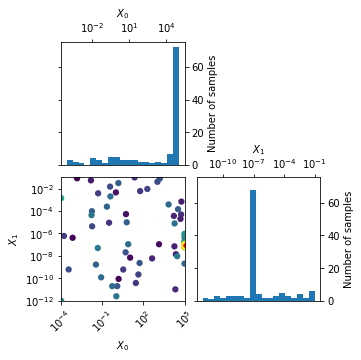

In [10]:
plots.plot_evaluations(res)

In [11]:
clfolders = [f for f in glob('data/results/hyperopt/*') if len(glob('{}/*'.format(f))) > 0]

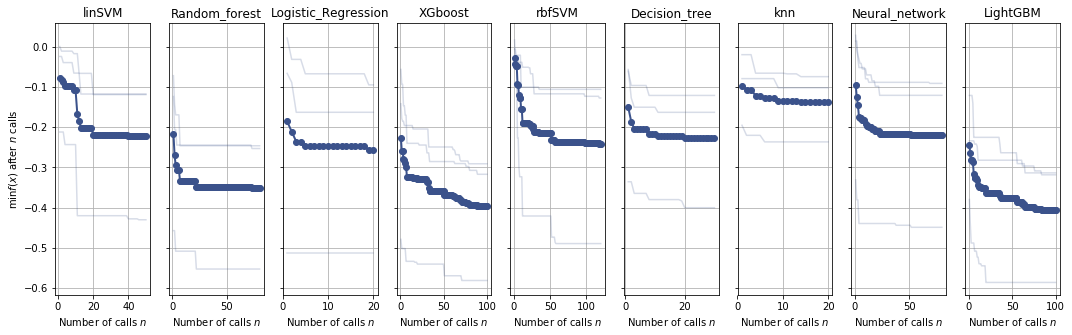

In [12]:
fig, ax = plt.subplots(1, len(clfolders), figsize=(18,5), sharey=True)
for i, clfolder in enumerate(clfolders):
    res = [load('{}/results_minimization_{}.pickle'.format(clfolder, rat)) for rat in ['ez_pfc','ez_str','sp_pfc']]
    plots.plot_convergence(res, ax=ax[i])
    ax[i].set_title(clfolder.split('/')[-1]); 
    if i>0:
        ax[i].set_ylabel('')

---

# Comparison of final results 

In [22]:
import pickle

In [25]:
sp_pfc = pickle.load(open('data/results/hyperopt/XGboost/sp_pfc_dict_res.pickle', 'rb'))

In [34]:
sp_pfc['func_vals'].min()

7572.147182703018

In [19]:
ls data/results/hyperopt/rbfSVM

ez_pfc_dict_res.pickle              results_minimization_ez_str.pickle
ez_str_dict_res.pickle              results_minimization_sp_pfc.pickle
results_minimization_ez_pfc.pickle  sp_pfc_dict_res.pickle


In [33]:
-res[0].func_vals.min()

0.313466964282031

In [46]:
from itertools import product
import pandas as pd

In [44]:

score = {(rat, clfolder.split('/')[-1]):-pickle.load(open('{}/{}_dict_res.pickle'.format(clfolder, rat), 'rb'))['func_vals'].min() for clfolder,rat in product(clfolders,['ez_pfc','ez_str','sp_pfc'])}
time = {(rat, clfolder.split('/')[-1]):pickle.load(open('{}/{}_dict_res.pickle'.format(clfolder, rat), 'rb'))['time'] for clfolder,rat in product(clfolders,['ez_pfc','ez_str','sp_pfc'])}

In [47]:
score = pd.DataFrame(score, index=['score'])
time = pd.DataFrame(time, index=['time'])

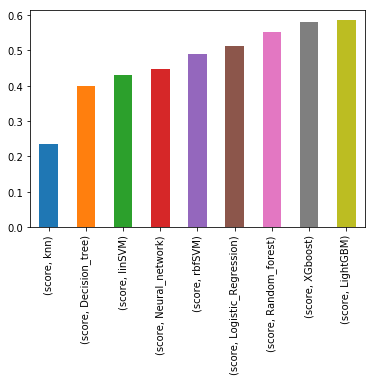

In [57]:
score.stack().max(1).sort_values().plot.bar()

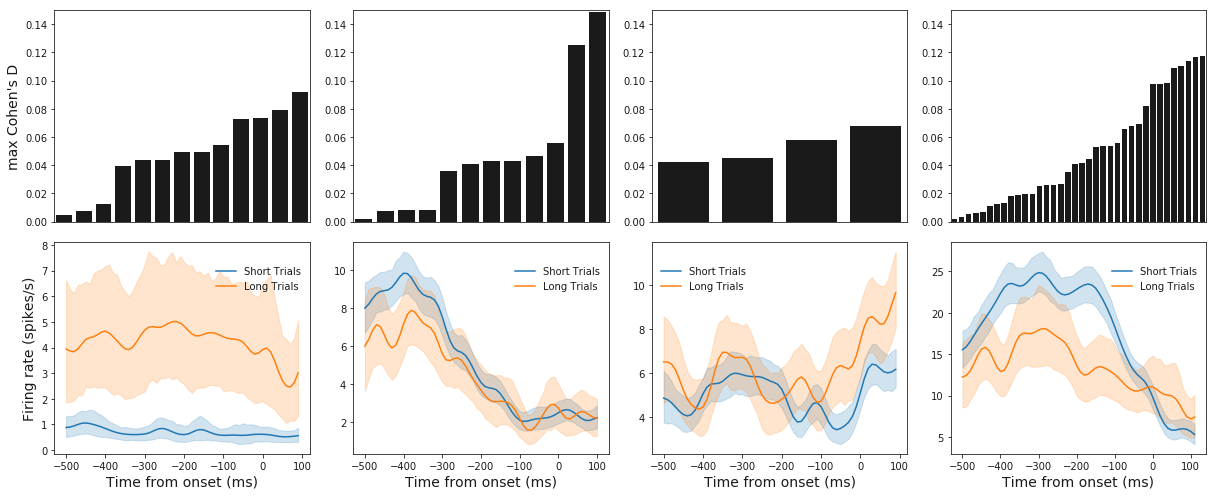

In [38]:
%run src/visualization/duration_dprime_allinone.py

---

In [1]:
import pandas as pd

In [11]:
receitas = pd.read_csv('../Untitled Folder/receitasArrecadadas.csv',sep=';')
receitas['Valor (R$)'] = receitas['Valor (R$)'].apply(lambda s: s.replace('.','').replace(',','.')).astype(float)

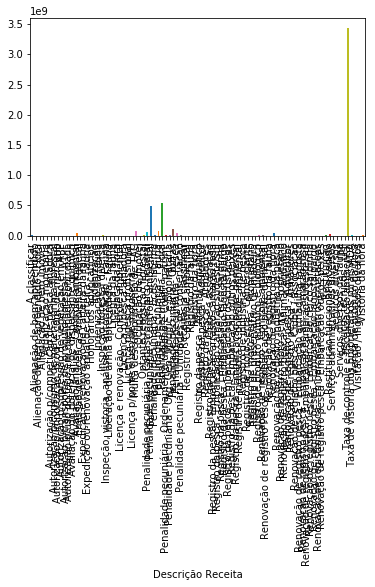

In [25]:
receitas.groupby('Descrição Receita')['Valor (R$)'].sum().plot.bar()

In [78]:
autoriz=['Atualização monetária',
       'Autorização p/competição de pesca amadora',
       'Autorização p/consumo de matéria prima florestal',
       'Autorização p/importação, prod. e com. de mercúrio',
       'Autorização p/supressão de vegetação em APP',
       'Autorização p/transporte de produto florestal - ATPF',
       'Autorização p/uso do fogo em queimada controlada']
alien = ['Alienação de bem apreendido',
       'Alienação de bem apreendido - Flora', 'Alienação de bem imóvel']
aval = ['Avaliação do potencial de dispersante químico',
       'Avaliação/analise - Controle ambiental']
emiss = ['Emissão de Licença Ambiental Federal',
       'Expedição e renovação de carteira da fauna',
       'Expedição ou renovação anual de carteira - Fauna']
inde = ['Honorários advocaticios', 'Indenização', 'Indenização da fauna',
       'Inspeção florestal diversa',
       'Inspeção, vistoria, análise e autorização - Fauna']
licen =  ['Liberação de arma apreendida - Fauna', 'Licença da fauna',
       'Licença da flora', 'Licença e renovação - Controle ambiental',
       'Licença p/pesca amadora', 'Licença p/pesca profissional',
       'Licença p/porte e uso de motoserra - LPU',
       'Multa descumprimento de TAC', 'Ocupação de imóvel',
       'Optante reposição florestal']

penal = ['Penalidade pecuniária - Cadastro Técnico Federal',
       'Penalidade pecuniária - Controle ambiental',
       'Penalidade pecuniária - Ecossistema',
       'Penalidade pecuniária - Fauna', 'Penalidade pecuniária - Flora',
       'Penalidade pecuniária - Ordenamento urbano e Contr. patrim.',
       'Penalidade pecuniária - Org. Gen. Modific. e Biopirataria',
       'Penalidade pecuniária - Outras', 'Penalidade pecuniária - Pesca',
       'Penalidade pecuniária - Unidades de conservação']

registro =['Registro - Controle ambiental',
       'Registro da fauna', 'Registro da flora',
       'Registro da pesca - Animal aquático',
       'Registro da pesca - Aqüicultor', 'Registro da pesca - Armadores',
       'Registro da pesca - Clube e associação',
       'Registro da pesca - Embarcação arrasto camarão rosa',
       'Registro da pesca - Embarcação camarão sudeste/sul',
       'Registro da pesca - Embarcação cerco sardinha',
       'Registro da pesca - Embarcação lagosta pargo',
       'Registro da pesca - Embarcação outros crustáceos',
       'Registro da pesca - Embarcação outros peixes',
       'Registro da pesca - Embarcação peixe demersal',
       'Registro de industria - Controle ambiental',
       'Registro de indústria de pesca',
       'Registro de moto-serra - Comerciante',
       'Registro de moto-serra - Proprietário',
       'Registro de preservativo de madeira',
       'Registro de produto químico e biológico']

renova = ['Renovação de registro - Controle ambiental',
       'Renovação de registro da fauna', 'Renovação de registro da flora',
       'Renovação de registro indústria da pesca',
       'Renovação de registro moto-serra - Proprietário',
       'Renovação de registro pesca - Animal aquático',
       'Renovação de registro pesca - Aquicultor',
       'Renovação de registro pesca - Armadores',
       'Renovação de registro pesca - Clube / associação',
       'Renovação de registro pesca - Embarcação armadilha lagosta',
       'Renovação de registro pesca - Embarcação arr. camarão rosa',
       'Renovação de registro pesca - Embarcação camarão sudeste/sul',
       'Renovação de registro pesca - Embarcação cerco sardinha',
       'Renovação de registro pesca - Embarcação lagosta pargo',
       'Renovação de registro pesca - Embarcação outros crustáceos',
       'Renovação de registro pesca - Embarcação outros peixes',
       'Renovação de registro Pesca - Embarcação peixe demersal']

outros =['Restituição', 'Restituição funcionário cedido',
       'Serviços administrativos diversos', 'Serviços diversos',
       'Serviços diversos da fauna', 'Serviços técnicos - LPF',
       'Taxa de vistoria dos proprietários rurais/ADA',
       'Venda de produto da flora', 'Visitação / ingressos diversos',
       'Vistoria da flora','A classificar', 'Alienação de bem apreendido',
       'Alienação de bem apreendido - Flora', 'Alienação de bem imóvel','Receitas a classificar']

fiscal = 'Taxa de controle e fiscalização ambiental'

var = {'Autorizações':autoriz,
       'Alienação':alien,
       'Avaliação':aval,
       'Licenças':emiss+inde+licen,
       'Penalidades':penal,
       'Registros':registro,
       'Renovação de Registro':renova,
       'Fiscalização':fiscal,
       'Outros':outros}
allvar = autoriz + alien + aval + emiss + inde + licen + penal + registro + renova + outros


In [36]:
receitas.columns = ['Cod', 'var', 'val', 'n', 'Ano']

In [60]:
def grupo(v):
    for key in var:
        if v in var[key]:
            return key

In [79]:
receitas['grupo'] = receitas['var'].apply(grupo)

In [83]:
receitas['R$ Milhões'] = receitas.val/1e6

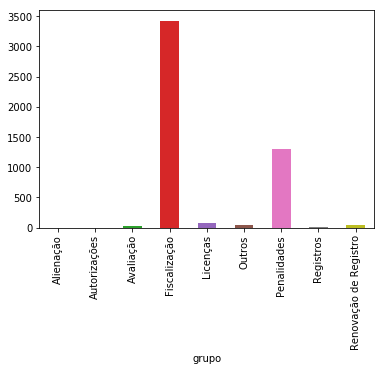

In [84]:
receitas.groupby('grupo')['R$ Milhões'].sum().plot.bar()

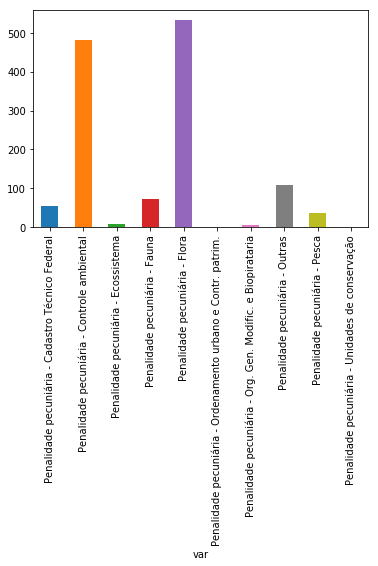

In [88]:
receitas[receitas.grupo=='Penalidades'].groupby('var')['R$ Milhões'].sum().plot.bar()

In [281]:
primeira = receitas.groupby('var').apply(lambda df: df[df.Ano == df.Ano.min()]['R$ Milhões']).reset_index(1,True)

In [313]:
primeira = receitas.groupby('var').apply(lambda df: df.sort_values('Ano')['R$ Milhões'].iloc[:10].mean())#.reset_index(1,True)

receitas['primeira'] = receitas['var'].map(primeira)

receitas['Normalizado'] = receitas['R$ Milhões']/receitas['primeira']

penals = receitas[receitas.grupo=='Penalidades']

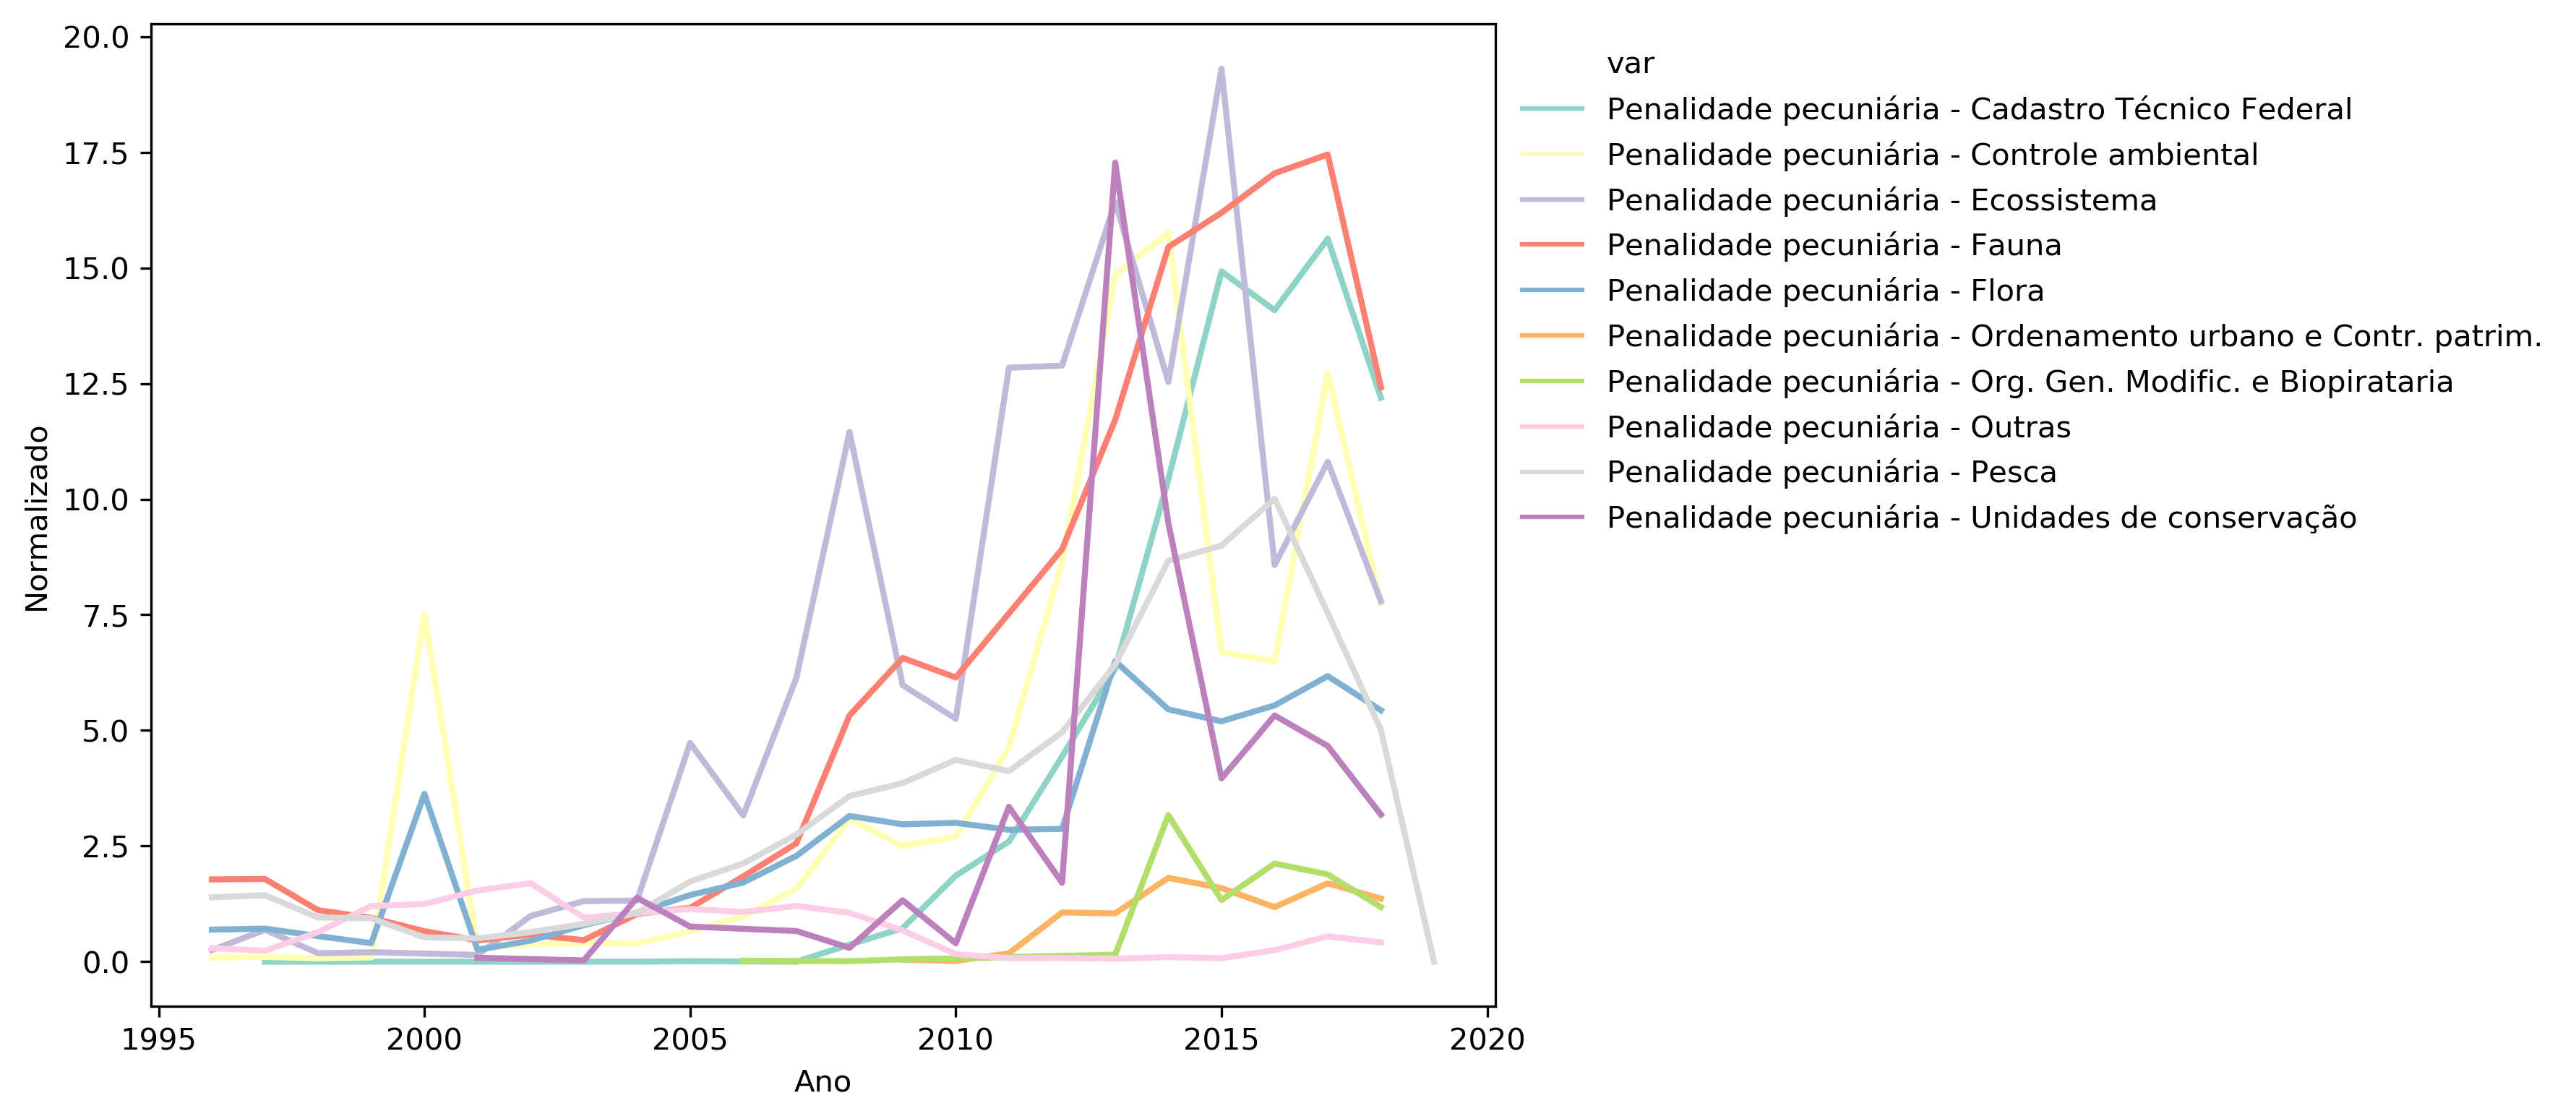

In [325]:
plt.figure(figsize=(8,6), dpi=300)
sns.lineplot(data=penals, x='Ano', y='Normalizado', hue='var', palette='Set3', linewidth=2)
plt.legend(bbox_to_anchor=(1,1), frameon=False)
# plt.ylim(0,10)

--- 

In [90]:
mangue = pd.read_csv('../Untitled Folder/veg_mangue_a.csv')

In [190]:
from shapely.wkt import loads

In [198]:
s=loads(mangue.geom[5])

In [228]:
mangue.uf.value_counts()

MA    1273
BA    1112
PA    1108
SP     453
PR     426
SE     393
CE     391
SC     281
RN     278
PE     213
AP     212
RJ     169
AL     160
ES     134
PB     114
PI      77
Name: uf, dtype: int64

In [234]:
from shapely.ops import cascaded_union

In [241]:
un = cascaded_union(mangue[mangue.uf=='SP'].geom.apply(loads).tolist())

In [188]:
def plot_geom(geom):
    try:    
        geom = pd.Series(geom.strip()[16:-3].split(',')).str.split(expand=True).astype(float)
        plt.plot(*geom.values.T)
        return True
    except:
        return False

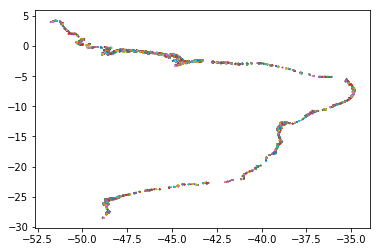

In [189]:
single = mangue.geom.apply(plot_geom)

In [168]:
from shapely.geometry import MultiPolygon
import re

In [186]:
t = re.search('\).*\(', mangue.geom[3] )
t

<_sre.SRE_Match object; span=(4620, 4624), match='), ('>

In [161]:
plot_geom(mangue.geom[3])

MULTIPOLYGON (((-37.36283729799993 -11.425047587999927, -37.36283729799993 -11.42556364199993, -37.36317753599991 -11.425917979999952, -37.363438996999946 -11.426190276999932, -37.36354531899991 -11.426711348999959, -37.36355181599993 -11.426743189999911, -37.36345866799991 -11.42745885499994, -37.363771088999954 -11.42799475299995, -37.36426633399992 -11.428844246999915, -37.36441675799995 -11.42910227099992, -37.364454363999926 -11.429581456999927, -37.36464026699991 -11.430128104999937, -37.36464239499992 -11.430134361999933, -37.364656554999954 -11.43013769299995, -37.36558254999994 -11.430355523999935, -37.36586284799995 -11.43034397599996, -37.36638236199991 -11.430322571999909, -37.36653501699993 -11.430316282999911, -37.366784139999936 -11.430230818999917, -37.36738764699993 -11.430023780999932, -37.36758293799994 -11.429956784999945, -37.36785213799993 -11.42986443399991, -37.368041181999956 -11.42979958099994, -37.3681397709999 -11.429765758999906, -37.368553438999925 -11.429

ValueError: could not convert string to float: '-11.425047587999927)'